In [2]:
# Importa los módulos necesarios
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Carga la matriz que hemos calculado con C
psii = np.loadtxt("psi.dat")
psii

array([[-3.048557, -3.04277 , -3.036765, ..., -2.996381, -3.00358 ,
        -3.01061 ],
       [-2.928845, -2.922848, -2.916605, ..., -2.874145, -2.881776,
        -2.889203],
       [-2.809376, -2.803171, -2.796692, ..., -2.752094, -2.760178,
        -2.768017],
       ..., 
       [ 2.295136,  2.288125,  2.2807  , ...,  2.22651 ,  2.236753,
         2.246501],
       [ 2.413239,  2.406392,  2.399166, ...,  2.347183,  2.356907,
         2.366205],
       [ 2.531706,  2.525038,  2.518026, ...,  2.468274,  2.477489,
         2.48634 ]])

In [4]:
# Comprueba las dimensiones en la malla
psii.shape

(50, 50)

In [5]:
# Datos

x0 = 0.2
y0 = 0.3 

a = 1
b = -0.770795717840213
beta = 3.383863361824123

alpha = 0

U = 1

In [6]:
N_malla = 50

x_max = 8
y_max = 3

x = np.linspace(-x_max, x_max, N_malla)
y = np.linspace(-y_max, y_max, N_malla)

XX, YY = np.meshgrid(x,y)

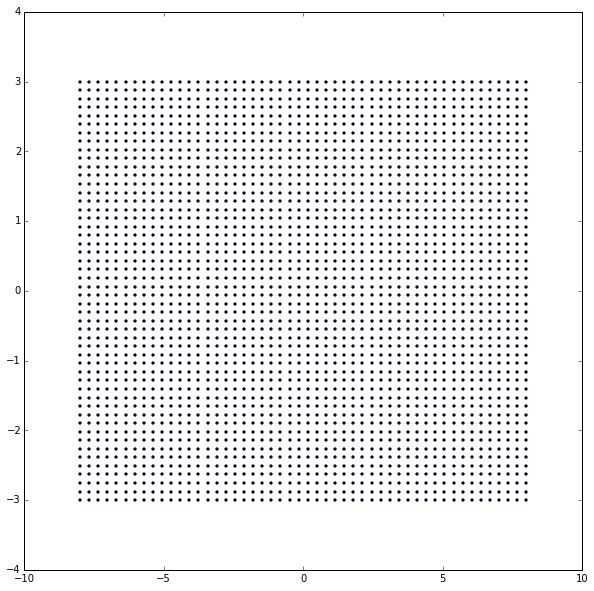

In [7]:
# Pintamos la malla para verla

plt.figure(figsize=(10,10))
plt.scatter(XX.flatten(), YY.flatten(), marker='.')

In [8]:
# Circulación que hay que añadir al cilindro para
# que se cumpla la hipótesis de Kutta en el perfil

T = 4 * np.pi * a * U * np.sin(alpha) 


In [9]:
rho = np.sqrt(np.power((XX-x0),2)+np.power((YY-y0),2))
theta = np.arctan((YY-y0)/(XX-x0))

psi = (rho * np.sin(theta-alpha) - np.sin(theta-alpha)/rho) * U + (np.log(abs(rho))*T)/(2*np.pi) 

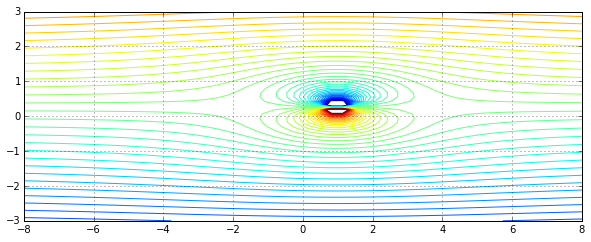

In [10]:
#lo visulaizamos
plt.figure('lineas de corriente', figsize=(10,10))

plt.contour(XX, YY, psii, np.linspace(-5,5,50))
plt.grid()
plt.gca().set_aspect(1)

In [11]:
Xc = x0 + a * np.cos(theta)
Yc = y0 + a * np.sin(theta)

AssertionError: 

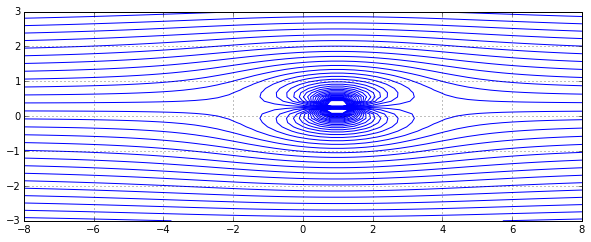

In [12]:
#ponemos el cilindro encima
plt.figure('flujo cilindro', figsize=(10,10))

plt.contour(XX, YY, psii, np.linspace(-5,5,50), colors=['blue', 'blue'])
plt.grid()
plt.gca().set_aspect(1)

p = plt.Polygon(list(zip(Xc, Yc)), color="#cccccc", zorder=3)
plt.gca().add_patch(p)

In [13]:
xx = XX * (1+(np.power(b,2)/(np.power(XX,2)+np.power(YY,2))))
yy = YY * (1-(np.power(b,2)/(np.power(XX,2)+np.power(YY,2))))

(-3, 3)

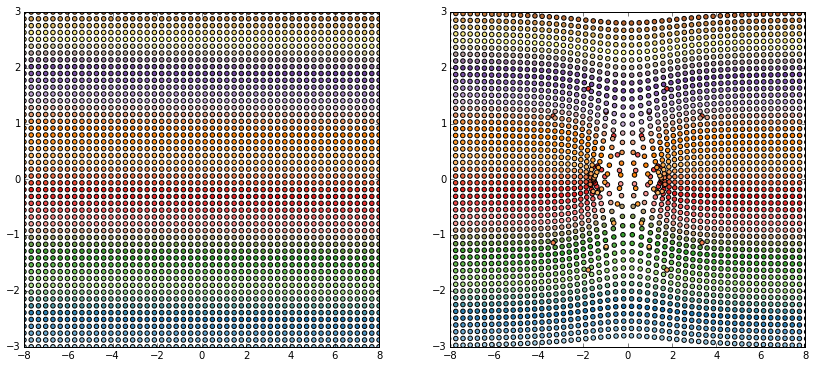

In [14]:
#pintamos la malla para ver como se ha transformado
plt.figure("malla", figsize=(14,6))
plt.subplot(1,2,1)

plt.scatter(XX.flatten(), YY.flatten(),\
              cmap=plt.cm.Paired, c=np.linspace(0,1, N_malla**2))

plt.xlim(-x_max,x_max)
plt.ylim(-y_max,y_max)

plt.subplot(1,2,2)

plt.scatter(xx.flatten(), yy.flatten(),\
              cmap=plt.cm.Paired, c=np.linspace(0,1, N_malla**2))

plt.xlim(-x_max,x_max)
plt.ylim(-y_max,y_max)

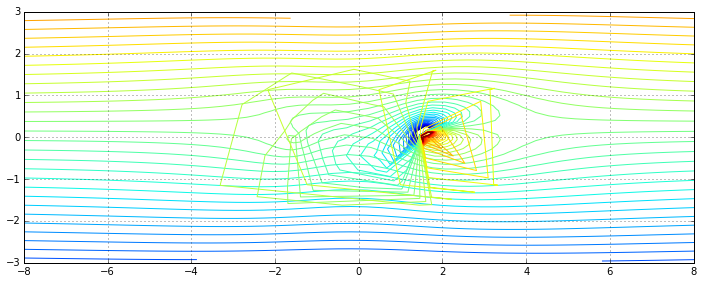

In [15]:


plt.figure("flujo perfil", figsize=(12,12))

plt.contour(xx, yy, psii, np.linspace(-5,5,50))

plt.xlim(-8,8)
plt.ylim(-3,3)
plt.grid()
plt.gca().set_aspect(1)



In [16]:
for i in range(0, 50):
    for j in range(0, 50):
        if (np.sqrt((XX[i][j] - x0)**2 + (YY[i][j] - y0)**2) < 0.5*a):
            XX[i][j] = 0
            YY[i][j] = 0
        

In [17]:
xx = XX * (1+(np.power(b,2)/(np.power(XX,2)+np.power(YY,2))))
yy = YY * (1-(np.power(b,2)/(np.power(XX,2)+np.power(YY,2))))

/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from IPython.kernel.zmq import kernelapp as app
/Users/pablordrrbl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from IPython.kernel.zmq import kernelapp as app


(-3, 3)

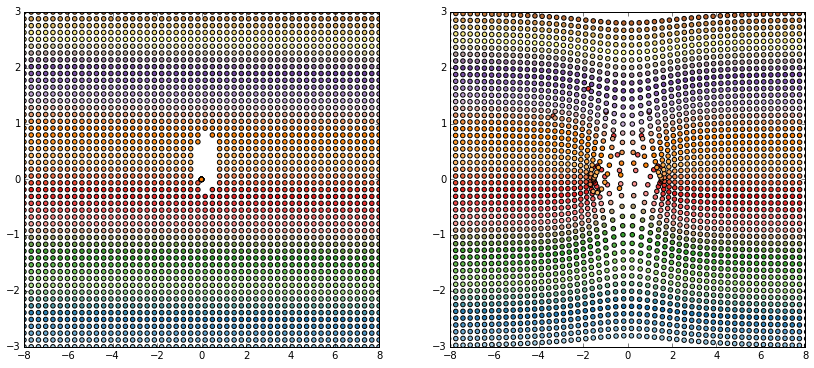

In [18]:
#pintamos la malla para ver como se ha transformado
plt.figure("malla", figsize=(14,6))
plt.subplot(1,2,1)

plt.scatter(XX.flatten(), YY.flatten(),\
              cmap=plt.cm.Paired, c=np.linspace(0,1, N_malla**2))

plt.xlim(-x_max,x_max)
plt.ylim(-y_max,y_max)

plt.subplot(1,2,2)

plt.scatter(xx.flatten(), yy.flatten(),\
              cmap=plt.cm.Paired, c=np.linspace(0,1, N_malla**2))

plt.xlim(-x_max,x_max)
plt.ylim(-y_max,y_max)

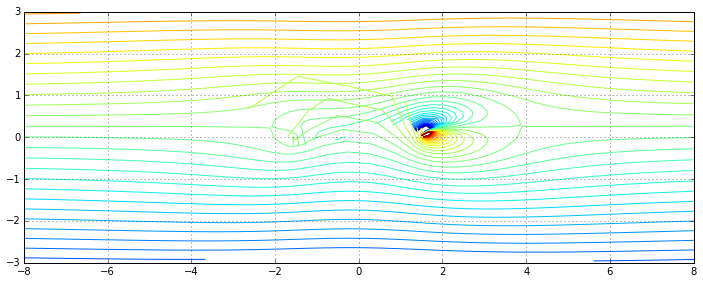

In [19]:

plt.figure("flujo perfil", figsize=(12,12))

plt.contour(xx, yy, psii, np.linspace(-5,5,45))

plt.xlim(-8,8)
plt.ylim(-3,3)
plt.grid()
plt.gca().set_aspect(1)

